# Lesson 1: Why Pretraining?

## 1. Install dependencies and fix seed

Welcome to Lesson 1!

If you would like to access the `requirements.txt` file for this course, go to `File` and click on `Open`.

## Update setuptools and wheel
Ensure that you have the latest versions of setuptools and wheel, as they are needed for building packages:

In [ ]:
#pip install --upgrade setuptools wheel

In [ ]:
# Install any packages if it does not exist
!pip install -q -r PretrainingLLMs/requirements.txt

In [4]:
# Ignore insignificant warnings (ex: deprecations)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set a seed for reproducibility
import torch

def fix_torch_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

fix_torch_seed()

In [29]:
# Check for available GPU and set the device
import pandas
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(pandas.__version__)

cuda
2.2.1


## 2. Download and save the model and tokenizer

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Define the directory where you want to save the model and tokenizer
directory = "pacth_to_directory"

# Load and cache the tokenizer and model in the specified directory
tokenizer = AutoTokenizer.from_pretrained("upstage/TinySolar-248m-4k", cache_dir=directory)
model = AutoModelForCausalLM.from_pretrained("upstage/TinySolar-248m-4k", cache_dir=directory)

# Save the tokenizer and model to the specified directory
tokenizer.save_pretrained(directory)
model.save_pretrained(directory)


## 2. Load a general pretrained model

This course will work with small models that fit within the memory of the learning platform. TinySolar-248m-4k is a small decoder-only model with 248M parameters (similar in scale to GPT2) and a 4096 token context window. You can find the model on the Hugging Face model library at [this link](https://huggingface.co/upstage/TinySolar-248m-4k).

You'll load the model in three steps:
1. Specify the path to the model in the Hugging Face model library
2. Load the model using `AutoModelforCausalLM` in the `transformers` library
3. Load the tokenizer for the model from the same model path

In [37]:
model_path_or_name = "PretrainingLLMs/models/upstage/TinySolar-248m-4k"

In [38]:
from transformers import AutoModelForCausalLM

tiny_general_model = AutoModelForCausalLM.from_pretrained(
    model_path_or_name,
    torch_dtype=torch.bfloat16
)
# Move the model to the selected device
tiny_general_model.to(device)

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 1024)
    (layers): ModuleList(
      (0-11): 12 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=1024, out_features=1024, bias=False)
          (k_proj): Linear(in_features=1024, out_features=256, bias=False)
          (v_proj): Linear(in_features=1024, out_features=256, bias=False)
          (o_proj): Linear(in_features=1024, out_features=1024, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=1024, out_features=4096, bias=False)
          (up_proj): Linear(in_features=1024, out_features=4096, bias=False)
          (down_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
  )
  (lm_head): Line

In [39]:
from transformers import AutoTokenizer
tiny_general_tokenizer = AutoTokenizer.from_pretrained(
    model_path_or_name
)

## 3. Generate text samples

Here you'll try generating some text with the model. You'll set a prompt, instantiate a text streamer, and then have the model complete the prompt:

In [40]:
prompt = "I am an AI engineer. I love"

In [45]:
inputs = tiny_general_tokenizer(prompt, return_tensors="pt").to(tiny_general_model.device)
# Move the inputs to the same device as the model
#inputs = {key: value.to(device) for key, value in inputs.items()}

In [46]:
from transformers import TextStreamer
streamer = TextStreamer(
    tiny_general_tokenizer,
    skip_prompt=True, # If you set to false, the model will first return the prompt and then the generated text
    skip_special_tokens=True
)

In [47]:
# Generate text
with torch.no_grad():  # Ensure no gradients are calculated for generation
    outputs = tiny_general_model.generate(
        **inputs, 
        streamer=streamer, 
        use_cache=True,
        max_new_tokens=128,
        do_sample=False, 
        temperature=0.0,
        repetition_penalty=1.1
    )

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


to write about the latest tech news and technology, but I'm not sure how to get started on it.
I have a lot of experience with this sort of thing, so I'll just say that I've been doing some research into the topic for quite a while now. I've been working on a project called "The Future of Work" which is a new kind of work-in-progress (WIP) project that aims to bring together people from different industries and backgrounds in order to create a more sustainable future. The idea behind WIP is to help people find their own way out of the current


## 4. Generate Python samples with pretrained general model

Use the model to write a python function called `find_max()` that finds the maximum value in a list of numbers:

In [24]:
prompt =  "def find_max(numbers):"

In [25]:
inputs = tiny_general_tokenizer(
    prompt, return_tensors="pt"
).to(tiny_general_model.device)

streamer = TextStreamer(
    tiny_general_tokenizer, 
    skip_prompt=True, # Set to false to include the prompt in the output
    skip_special_tokens=True
)

In [26]:
outputs = tiny_general_model.generate(
    **inputs, 
    streamer=streamer, 
    use_cache=True, 
    max_new_tokens=128, 
    do_sample=False, 
    temperature=0.0, 
    repetition_penalty=1.1
)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



   """
   Returns the number of times a user has been added to the list.
   """
   num = len(list)
   if len(list[0]) > 1:
       return int(len(list))
   else:
       return int(len(list))


def get_user_id(user_id, user_name):
   """
   Returns the user id for this user.
   """
   return user_id


def get_user_id_from_user(user_id, user_name):



## 5. Generate Python samples with finetuned Python model

This model has been fine-tuned on instruction code examples. You can find the model and information about the fine-tuning datasets on the Hugging Face model library at [this link](https://huggingface.co/upstage/TinySolar-248m-4k-code-instruct).

You'll follow the same steps as above to load the model and use it to generate text.

In [56]:
model_path_or_name = "PretrainingLLMs/models/upstage/TinySolar-248m-4k-instruct"

In [53]:
tiny_finetuned_model = AutoModelForCausalLM.from_pretrained(
    model_path_or_name,
    torch_dtype=torch.bfloat16,
)

# Move the model to the selected device
tiny_finetuned_model.to(device)

tiny_finetuned_tokenizer = AutoTokenizer.from_pretrained(
    model_path_or_name
)

In [ ]:
prompt =  "def find_min(numbers):"

inputs = tiny_finetuned_tokenizer(
    prompt, return_tensors="pt"
).to(tiny_finetuned_model.device)

streamer = TextStreamer(
    tiny_finetuned_tokenizer,
    skip_prompt=True,
    skip_special_tokens=True
)

# Generate text
with torch.no_grad():  # Ensure no gradients are calculated for generation
    outputs = tiny_finetuned_model.generate(
        **inputs,
        streamer=streamer,
        use_cache=True,
        max_new_tokens=128,
        do_sample=False,
        temperature=0.0,
        repetition_penalty=1.1
    )

## 6. Generate Python samples with pretrained Python model

Here you'll use a version of TinySolar-248m-4k that has been further pretrained (a process called **continued pretraining**) on a large selection of python code samples. You can find the model on Hugging Face at [this link](https://huggingface.co/upstage/TinySolar-248m-4k-py).

You'll follow the same steps as above to load the model and use it to generate text.

In [65]:
model_path_or_name = "PretrainingLLMs/models/upstage/TinySolar-248m-4k-py" 

In [66]:
tiny_custom_model = AutoModelForCausalLM.from_pretrained(
    model_path_or_name,
    torch_dtype=torch.bfloat16,    
)
# Move the model to the selected device
tiny_custom_model.to(device)

tiny_custom_tokenizer = AutoTokenizer.from_pretrained(
    model_path_or_name
)

In [67]:
prompt = "def find_max(numbers):"

inputs = tiny_custom_tokenizer(
    prompt, return_tensors="pt"
).to(tiny_custom_model.device)

streamer = TextStreamer(
    tiny_custom_tokenizer,
    skip_prompt=True, 
    skip_special_tokens=True
)

outputs = tiny_custom_model.generate(
    **inputs, streamer=streamer,
    use_cache=True, 
    max_new_tokens=128, 
    do_sample=False, 
    repetition_penalty=1.1
)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


   """Find the maximum number of numbers in a list."""
   max = 0
   for num in numbers:
       if num > max:
           max = num
   return max


def get_min_max(numbers, min_value=1):
   """Get the minimum value of a list."""
   min_value = min_value or 1
   for num in numbers:
       if num < min_value:
           min_value = num
   return min_value



Try running the python code the model generated above:

In [68]:
def find_max(numbers):
   max = 0
   for num in numbers:
       if num > max:
           max = num
   return max



In [70]:
find_max([1,3,5,9,6,7,2])

9

![Screenshot 2024-08-02 134444.png](<attachment:Screenshot 2024-08-02 134444.png>)
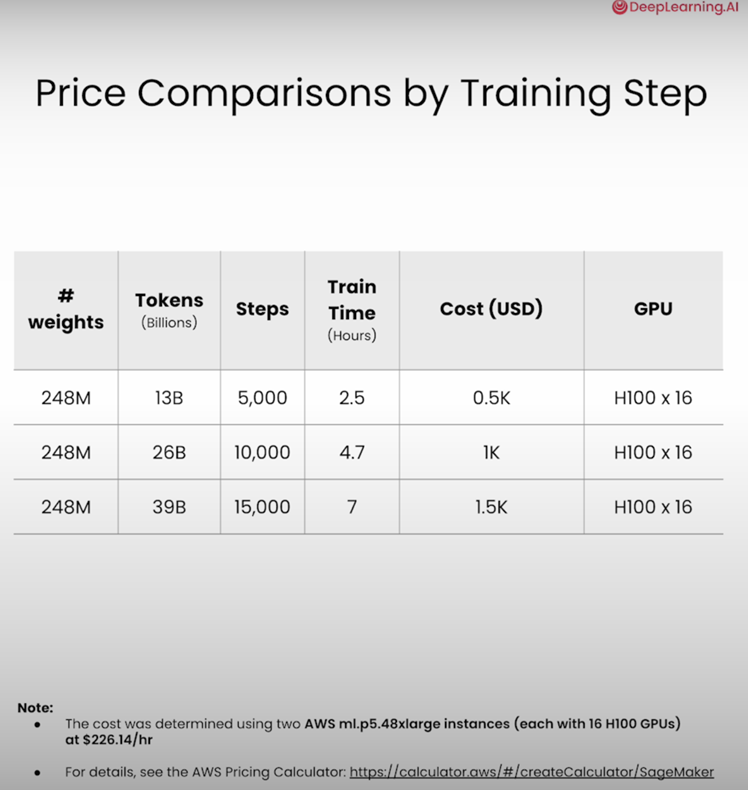